In [111]:
import numpy as np
import pandas as pd
import bokeh.plotting as plt
import pickle

__author__ = 'amanda'

In [112]:
# main
colors = color_coding()
sex_ind, age_ind, twin_ind, group_correlation, self_correlation = load_group_meta_data()

In [116]:
# Find the person who have low group correlation, high or low self-correlation
group_correlation.mean()

0.72433785360271086

In [118]:
group_correlation[group_correlation>0.4].mean()

0.73028264666886988

In [121]:
# Group average: female and male. 
rating_data = np.load('./tmp/clean_rating_data.npz')
orig_rating = rating_data['full_rating'] 


In [126]:
female_group = orig_rating[sex_ind==1, :]  # 1 for female
male_group = orig_rating[sex_ind==2, :]

In [128]:
female_ave = np.mean(female_group, axis=0)
female_average = female_ave.tolist()

In [129]:
male_ave = np.mean(male_group, axis=0)
male_average = male_ave.tolist()

In [ ]:
female_group_vs_male_ave
female_group_vs_female_ave

In [130]:
def group_correlation_comp(group_data, ave_data):
    group_corr_array = []
    for i in range(group_data.shape[0]):
        cov = np.corrcoef(ave_data, orig_rating[i, :])
        group_corr_array.append(cov[0, 1])
    return group_corr_array

female_group_vs_male_ave = group_correlation_comp(female_group, male_average)
female_group_vs_female_ave = group_correlation_comp(female_group, female_average)
male_group_vs_male_ave = group_correlation_comp(male_group, male_average)
male_group_vs_female_ave = group_correlation_comp(male_group, female_average)



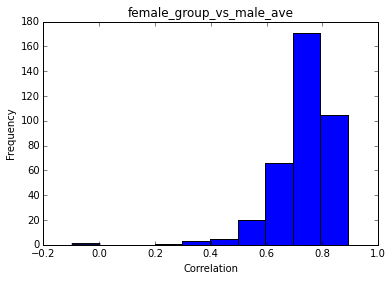

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(female_group_vs_male_ave)
plt.title("female_group_vs_male_ave")
plt.xlabel("Correlation")
plt.ylabel("Frequency")

In [136]:
 np.asarray(female_group_vs_male_ave).mean()

0.73141024683205569

0.731125651891


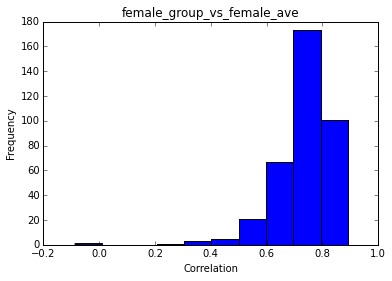

In [137]:
plt.hist(female_group_vs_female_ave)
plt.title("female_group_vs_female_ave")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
print  np.asarray(female_group_vs_female_ave).mean()

0.726297042452


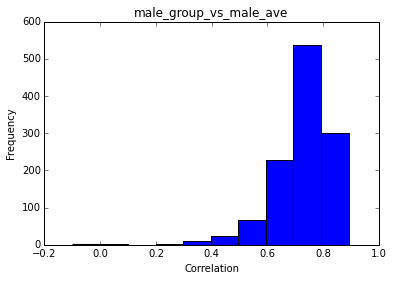

In [138]:
plt.hist(male_group_vs_male_ave)
plt.title("male_group_vs_male_ave")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
print  np.asarray(male_group_vs_male_ave).mean()

0.725860679128


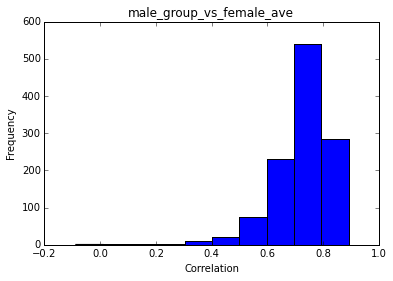

In [139]:
plt.hist(male_group_vs_female_ave)
plt.title("male_group_vs_female_ave")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
print  np.asarray(male_group_vs_female_ave).mean()

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


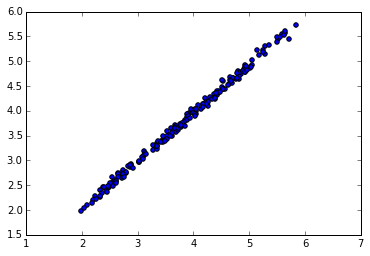

In [140]:
plt.scatter(female_average, male_average)